# Text Classification - LSTM

**Raynold Panji Zulfiandi**

> Dataset : https://www.kaggle.com/datasets/athu1105/book-genre-prediction

## Download Datasets

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raynoldpanji","key":"fdfe72c4650d0603c8c50ad8ea6c433d"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# test kaggle dataset list
!kaggle datasets list 

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          10462        312  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09           1026         38  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2720         74  1.0              
evangower/premier-league-match-data                            Pr

In [272]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d athu1105/book-genre-prediction
# !kaggle datasets download -d pashupatigupta/emotion-detection-from-text

  0% 0.00/1.56M [00:00<?, ?B/s]
100% 1.56M/1.56M [00:00<00:00, 164MB/s]


In [273]:
!mkdir dataset
!unzip book-genre-prediction.zip -d dataset
# !unzip emotion-detection-from-text.zip -d dataset
!ls dataset

Archive:  emotion-detection-from-text.zip
  inflating: dataset/tweet_emotions.csv  
data.csv  tweet_emotions.csv


## Load Dataset

In [7]:
import pandas as pd

In [277]:
df = pd.read_csv("dataset/data.csv")
df

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [278]:
df['genre'].value_counts()

thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

In [237]:
df2 = df[~df['genre'].isin(['travel','sports', 'psychology', 'romance', 'fantasy', 'thriller'])]
df2['genre'].value_counts()

science    647
history    600
horror     600
crime      500
Name: genre, dtype: int64

In [238]:
df2

,index,title,genre,summary
500,500,Starcross,science,"Protagonist Arthur (""Art"") Mumby and his olde..."
501,501,Glasshouse,science,It is the 27th century. The culture featured ...
502,502,Rocheworld,science,"In Rocheworld, a small group of civilian and ..."
503,503,Master of the Void,science,"In the post-war galaxy, ruined civilizations ..."
504,504,Vulcan's Hammer,science,"In 2029 CE, the Earth is run by the Unity org..."
...,...,...,...,...
3553,3553,The Ultimate Hitchhiker's Guide to the Galaxy,science,"At last in paperback in one complete volume, h..."
3554,3554,The Stand,science,Stephen King's apocalyptic vision of a world b...
3555,3555,The Fall of Hyperion,science,In the stunning continuation of the epic adven...
3556,3556,Ubik,science,Glen Runciter está muerto. ¿O lo están todos l...


In [239]:
## cek jika data yang null
df.isnull().sum() 

index      0
title      0
genre      0
summary    0
dtype: int64

In [240]:
# delete colom yang tidak digunakan
df_new = df2.drop(columns=['index', 'title'])
df_new

,genre,summary
500,science,"Protagonist Arthur (""Art"") Mumby and his olde..."
501,science,It is the 27th century. The culture featured ...
502,science,"In Rocheworld, a small group of civilian and ..."
503,science,"In the post-war galaxy, ruined civilizations ..."
504,science,"In 2029 CE, the Earth is run by the Unity org..."
...,...,...
3553,science,"At last in paperback in one complete volume, h..."
3554,science,Stephen King's apocalyptic vision of a world b...
3555,science,In the stunning continuation of the epic adven...
3556,science,Glen Runciter está muerto. ¿O lo están todos l...


## Data Preprocessing

In [241]:
# One-hot encoding

genre = pd.get_dummies(df_new.genre)
df_new = pd.concat([df_new, genre], axis=1)
df_new = df_new.drop(columns='genre')
df_new

,summary,crime,history,horror,science
500,"Protagonist Arthur (""Art"") Mumby and his olde...",0,0,0,1
501,It is the 27th century. The culture featured ...,0,0,0,1
502,"In Rocheworld, a small group of civilian and ...",0,0,0,1
503,"In the post-war galaxy, ruined civilizations ...",0,0,0,1
504,"In 2029 CE, the Earth is run by the Unity org...",0,0,0,1
...,...,...,...,...,...
3553,"At last in paperback in one complete volume, h...",0,0,0,1
3554,Stephen King's apocalyptic vision of a world b...,0,0,0,1
3555,In the stunning continuation of the epic adven...,0,0,0,1
3556,Glen Runciter está muerto. ¿O lo están todos l...,0,0,0,1


In [242]:
label_list = df_new.columns[1:].tolist()
label_list

['crime', 'history', 'horror', 'science']

In [243]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [244]:
df_new['summary'][0]

KeyError: ignored

In [245]:
## Menghilangkan stopwords

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
sentences = df_new['summary']

for i, sent in enumerate(sentences):
  for word in STOPWORDS:
      token = ' ' + word + ' '
      sent = sent.replace(token, ' ')
      sentences[i] = sent.replace(' ', ' ')

In [246]:
sentences[0]

' Protagonist Arthur ("Art") Mumby older sister Myrtle invited Starcross hotel small periodically barren asteroid. There, Arthur’s mother Emily suspects Starcross built piece Mars routinely slips hole fabric time, Myrtle discovers Sir Richard Burton Martian wife Ulla changed trees. Jack Havock, British secret agent, appears scene disguised Indian prince. In following night attacked Moobs, species resembling animated black top hats, take control Jack’s crew guests, including Emily. Myrtle Jack escape, become lost deserts prehistoric Mars. There, encounter Delphine, one guests, French secret agent determined find grandfather’s wrecked ship create American-style republic name. At wreck, discover Delphine’s grandfather killed Moobs, later learn Moobs native time period near end universe, live chiefly feeding species\' thoughts. A well-intentioned Moob helps Jack win Delphine’s soldiers side, return Starcross. There, Moobs load Jack\'s ship comrades plan take control local societies. Art fr

In [247]:
## ubah text jadi lower-case
df_new['summary'] = sentences.apply(lambda x: x.lower())
df_new['summary']

500      the novel's central character joe cashin, mel...
501      jane marple, elderly amateur sleuth, takes ho...
502      the story told peter aaron victim, benjamin s...
503      while staying aunt jane suffolk, adam dalglie...
504      serge follows suitcase containing five millio...
                              ...                        
3553    at last in paperback in one complete volume, h...
3554    stephen king's apocalyptic vision of a world b...
3555    in the stunning continuation of the epic adven...
3556    glen runciter está muerto. ¿o lo están todos l...
3557    jeune astronome convaincue de l'existence d'un...
Name: summary, Length: 2347, dtype: object

In [248]:
# Splitting data kalimat dan label menjadi X dan y
X = df_new['summary'].values
y = df_new.drop(columns='summary').values

In [249]:
# Split data menjadi train dan test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [265]:
## Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<oov>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{"}~\t\n',)
tokenizer.fit_on_texts(X_train) 
# tokenizer.fit_on_texts(X_test)

X_seq_train = tokenizer.texts_to_sequences(X_train)
X_seq_test = tokenizer.texts_to_sequences(X_test)

max([len(x) for x in X_seq_train])

3276

In [266]:
## Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad_train = pad_sequences(
    X_seq_train,
    # padding='pre',
    # maxlen=200,
    # truncating='pre'
) 
X_pad_test = pad_sequences(
    X_seq_test,
    # padding='pre',
    # maxlen=200,
    # truncating='pre'
) 

## Training Model

In [267]:
num_class = len(label_list)
num_class

4

In [268]:
## Buat model arsitektur neural network

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, None, 16)          160000    
                                                                 
 lstm_46 (LSTM)              (None, 64)                20736     
                                                                 
 dense_124 (Dense)           (None, 512)               33280     
                                                                 
 dropout_63 (Dropout)        (None, 512)               0         
                                                                 
 dense_125 (Dense)           (None, 128)               65664     
                                                                 
 dropout_64 (Dropout)        (None, 128)               0         
                                                                 
 dense_126 (Dense)           (None, 4)               

In [269]:
## compile model

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = "categorical_crossentropy", optimizer=opt_adam, metrics=['accuracy'])

In [270]:
## membuat callbacks earlystop 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") >= 0.95 and logs.get("val_accuracy") >= 0.95):
      print("Target reached!")
      self.model.stop_training = True
    if(logs.get("val_loss") >= 4.0):
      print("Target reached!")
      self.model.stop_training = True

callbacks = myCallback()

In [271]:
## Train model

num_epochs = 50
history = model.fit(
    X_pad_train, y_train, 
    epochs=num_epochs, 
    validation_data=(X_pad_test, y_test), 
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/50
59/59 [==============================] - 9s 116ms/step - loss: 1.3491 - accuracy: 0.3255 - val_loss: 1.2719 - val_accuracy: 0.3596
Epoch 2/50
59/59 [==============================] - 6s 105ms/step - loss: 1.0623 - accuracy: 0.5253 - val_loss: 1.1861 - val_accuracy: 0.4383
Epoch 3/50
59/59 [==============================] - 6s 104ms/step - loss: 0.7815 - accuracy: 0.6404 - val_loss: 1.3079 - val_accuracy: 0.4638
Epoch 4/50
59/59 [==============================] - 6s 107ms/step - loss: 0.5426 - accuracy: 0.8023 - val_loss: 1.2822 - val_accuracy: 0.5128
Epoch 5/50
59/59 [==============================] - 6s 107ms/step - loss: 0.4032 - accuracy: 0.8540 - val_loss: 1.5102 - val_accuracy: 0.5085
Epoch 6/50
59/59 [==============================] - 6s 106ms/step - loss: 0.2345 - accuracy: 0.9217 - val_loss: 2.1254 - val_accuracy: 0.4957
Epoch 7/50
59/59 [==============================] - 6s 104ms/step - loss: 0.2023 - accuracy: 0.9302 - val_loss: 1.9801 - val_accuracy: 0.4638
Epoch 

In [279]:
## evaluasi model
model.evaluate(X_pad_test, y_test)

15/15 [==============================] - 1s 45ms/step - loss: 4.1631 - accuracy: 0.4617


[4.163113117218018, 0.4617021381855011]

## Plot loss dan akurasi

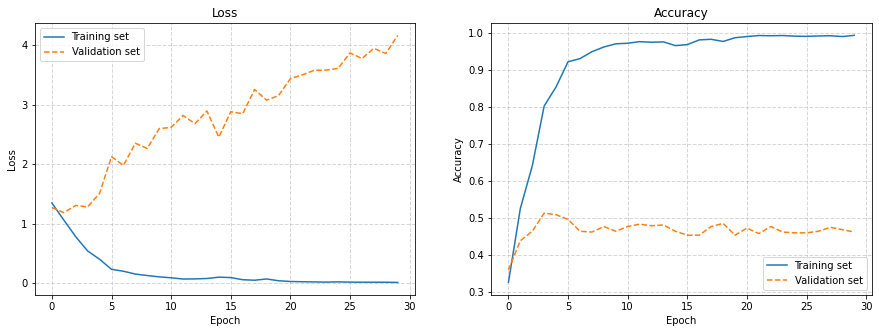

In [280]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

## Plot Confusing Matrix

In [281]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [282]:
predictions = model.predict(X_pad_test)
predictions[:5]

array([[3.8218364e-01, 6.1764163e-01, 2.2682834e-05, 1.5201555e-04],
       [3.6256979e-04, 8.4413004e-01, 2.9013648e-03, 1.5260610e-01],
       [3.1534219e-04, 2.3708928e-03, 1.3733463e-01, 8.5997903e-01],
       [9.7373790e-01, 2.6262080e-02, 4.6000232e-13, 1.6419432e-11],
       [9.9930382e-01, 6.9603458e-04, 6.9352513e-10, 1.2486001e-07]],
      dtype=float32)

In [284]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([1, 1, 3, 0, 0])

In [285]:
labels_test = np.argmax(y_test, axis=1)
labels_test[:5]

array([1, 2, 2, 2, 1])

In [286]:
print(classification_report(labels_test, prediction_labels, target_names=label_list))
print("===============================================================")
print("===============================================================")
pd.DataFrame(confusion_matrix(labels_test, prediction_labels), index=label_list, columns=label_list)

              precision    recall  f1-score   support

       crime       0.65      0.56      0.60        99
     history       0.36      0.38      0.37       129
      horror       0.36      0.50      0.42       102
     science       0.58      0.44      0.50       140

    accuracy                           0.46       470
   macro avg       0.49      0.47      0.47       470
weighted avg       0.49      0.46      0.47       470



,crime,history,horror,science
crime,55,34,3,7
history,13,49,57,10
horror,2,21,51,28
science,15,33,30,62
